<a href="https://colab.research.google.com/github/lesarmiento37/coder-proyecto/blob/main/Copia_de_ProyectoCoderhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias= (no he podido importar las siguientes librerias>>>>>>>>>>import plotly.express as px, import pandas_profiling, import missingno as msno


In [12]:
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from seaborn import distplot
from seaborn import distplot
from seaborn import boxplot
from seaborn import violinplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
import seaborn as sns


Cargamos la informacion de creditos otorgados  desde el 2007 al 2014
Objetivo= determinar en funcion de estos  creditos otorgados un modelo predictivo que nos permita  predecir que  personas son aptas o no para acceder a un credito bancario

In [13]:
tabla = pd.read_csv(r"C:/Users/vn52rr7/Downloads/loan_data_2007_2014.csv", sep=',' ,encoding='latin-1')
tabla.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


                                                        Data Mining (Limpieza dde datos)

In [14]:
#Se borran las columnas redundantes>>>>>>>>>> falta la variable id se  boorra luego de completar los nan
tabla.drop(columns = ['member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title','zip_code','recoveries', 'collection_recovery_fee','total_rec_prncp', 'total_rec_late_fee','application_type'], inplace = True)

TRATAMIENTO DE LOS NAN

In [16]:
#Se borran las columnas que tienen mas del 80% de los datos nulos
tabla.dropna(thresh = tabla.shape[0]*0.2, how = 'all', axis = 1, inplace = True)

In [17]:
#se identifica los nan a traves de la formula isnull
tabla.isnull().sum()

id                                  0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc   

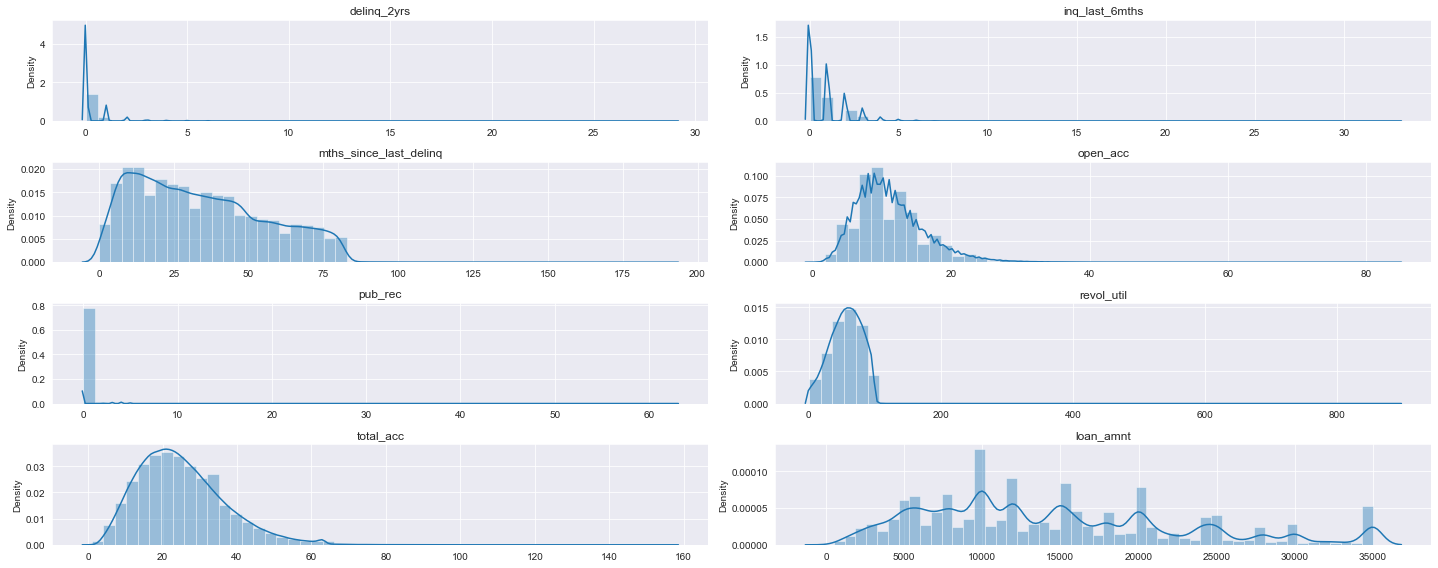

In [18]:
# De las variabes que   todavia tienen nan Se realiza la comparación de varias variables de interés en un gráfico simultaneo,  a find e de dterminar cual es su valor promedio
variables = ['delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec','revol_util','total_acc','loan_amnt']
columns = 2
fig, axes = plt.subplots(4,2)
for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(data[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()

In [19]:
#variable 'emp_length', se  analiza su composicion
tabla.groupby('emp_length').id.count()

emp_length
1 year        29622
10+ years    150049
2 years       41373
3 years       36596
4 years       28023
5 years       30774
6 years       26112
7 years       26180
8 years       22395
9 years       17888
< 1 year      36265
Name: id, dtype: int64

In [20]:
tabla.emp_length.fillna('10+ years',inplace=True)

In [21]:
#variable 'delinq_2yrs'
tabla.groupby('delinq_2yrs').id.count()

delinq_2yrs
0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
16.0         5
17.0         3
18.0         6
19.0         3
21.0         2
22.0         2
24.0         1
29.0         1
Name: id, dtype: int64

In [22]:
# en base al analisis de la distribucion  analizada se determian el valor  correspondien te a a signar al Nan
tabla.delinq_2yrs.fillna(0.0,inplace=True)

In [24]:
#variable 'earliest_cr_line'
tabla['earliest_cr_line'].value_counts()

Oct-00    3703
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Jul-55       1
Feb-57       1
Oct-54       1
May-53       1
Nov-56       1
Name: earliest_cr_line, Length: 664, dtype: int64

In [25]:
tabla.earliest_cr_line.fillna('Oct-00',inplace=True)

In [26]:
#variable 'last_pymnt_d'
tabla['last_pymnt_d'].value_counts()

Jan-16    179620
Dec-15     62000
Jul-15     11703
Oct-15     11248
Sep-15     10204
           ...  
Jun-08        20
Mar-08        18
Jan-08        11
Feb-08         8
Dec-07         2
Name: last_pymnt_d, Length: 98, dtype: int64

In [27]:
tabla.last_pymnt_d.fillna('Jan-16',inplace=True)

In [28]:
#variable 'last_credit_pull_d'
tabla['last_credit_pull_d'].value_counts()

Jan-16    327699
Dec-15     13992
Nov-15      8384
Sep-15      8051
Oct-15      7957
           ...  
Nov-07         3
May-08         1
Jun-08         1
Jul-08         1
Jul-07         1
Name: last_credit_pull_d, Length: 103, dtype: int64

In [29]:
tabla.last_credit_pull_d.fillna('Jan-16',inplace=True)

In [30]:
#variable 'inq_last_6mths'
tabla.groupby('inq_last_6mths').id.count()

inq_last_6mths
0.0     241498
1.0     130148
2.0      57825
3.0      25126
4.0       7241
5.0       2768
6.0       1188
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
13.0         6
14.0         6
15.0         9
16.0         3
17.0         2
18.0         4
19.0         2
20.0         1
24.0         2
25.0         1
27.0         1
28.0         1
31.0         1
32.0         1
33.0         1
Name: id, dtype: int64

In [31]:
tabla.inq_last_6mths.fillna(0.0,inplace=True)

In [32]:
#se los nan que que quedan se rellenan con cero
tabla.fillna(0,inplace=True)

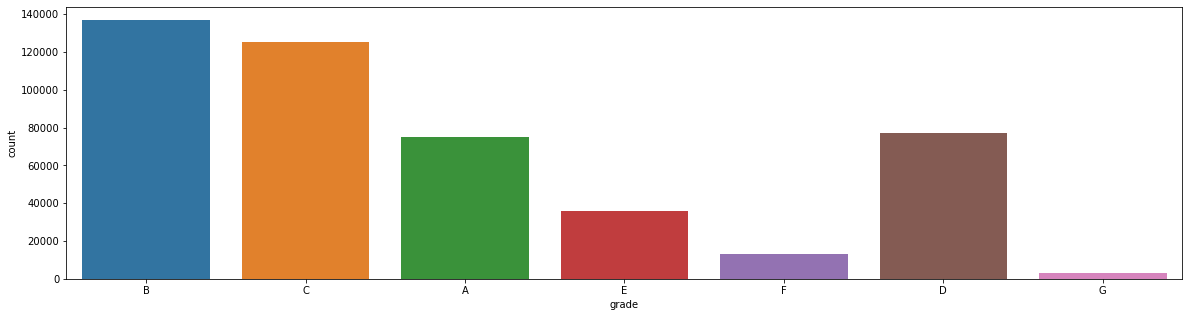

In [11]:
#Se añade conteo de las veces en las que se clasifica en cierto grado de crédito
plt.figure(figsize = (20,5))
sns.countplot(x = data['grade'], data = data)
plt.show()

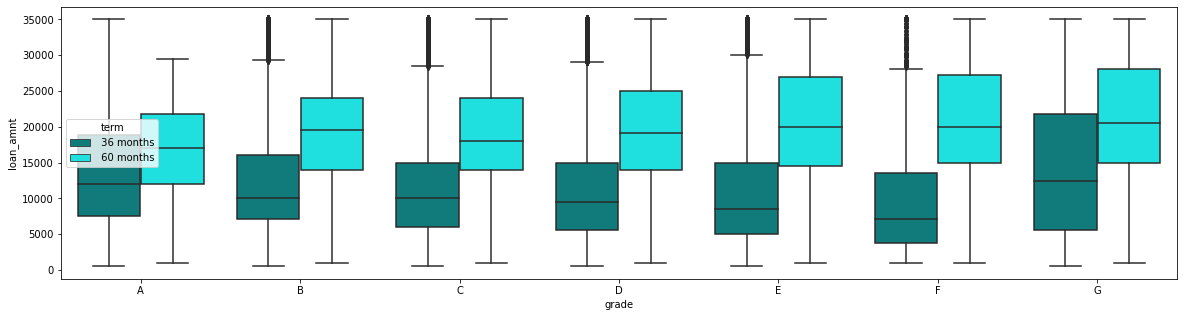

In [12]:
#Identificar el boxplot del término de pago según el grado y la cantidad de préstamo
plt.figure(figsize = (20,5))
sns.boxplot(x='grade', y = 'loan_amnt', hue = 'term',data = data, palette = ['#008B8B','#00FFFF'], order = ['A','B','C','D','E','F','G'])
plt.show()

                       Tratamiento de la variables categoricas y las fechas

In [36]:
# la variable emp_length se corrige y se convierte a variable numerica
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
emp_length_converter(tabla,'emp_length')

AttributeError: Can only use .str accessor with string values!

In [37]:
#convertimos  el dato de fecha a formato data time de las variables 'earliest_cr_line','issue_d', 'last_pymnt_d' y 'last_credit_pull_d'

def date_columns(tabla, column):
    tabla[column] = pd.to_datetime(tabla[column], format = "%b-%y")
   #create a new column as a difference between today and the respective date
    today_date = pd.to_datetime('2022-03-29')
    # calculate the difference in months and add to a new column
    tabla['mths_since_' + column] = round(pd.to_numeric((today_date - tabla[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    tabla['mths_since_' + column] = tabla['mths_since_' + column].apply(lambda x: tabla['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    tabla.drop(columns = [column], inplace = True)
date_columns(tabla, 'earliest_cr_line')
date_columns(tabla, 'issue_d')
date_columns(tabla, 'last_pymnt_d')
date_columns(tabla, 'last_credit_pull_d')

In [39]:
#transformamos la variable categorica home_ownership a numerica
tabla.groupby('home_ownership').id.count()

home_ownership
1        51
2    235875
3       182
4     41704
5    188473
Name: id, dtype: int64

In [ ]:
tabla.home_ownership.replace(('ANY','MORTGAGE','NONE','OTHER','OWN','RENT'),(1,2,1,3,4,5),inplace=True)

In [40]:
# variable term transformarla a numerica y quitar months
tabla.groupby('term').id.count()

term
 36 months    337953
 60 months    128332
Name: id, dtype: int64

In [41]:
tabla['term'] = pd.to_numeric(tabla['term'].str.replace(' months', ''))

In [42]:
tabla.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'last_pymnt_amnt', 'next_pymnt_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'mths_since_earliest_cr_line', 'mths_since_issue_d',
       'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d'],
      dtype='object')

In [43]:
#Renombrar las columnas
tabla_df=tabla.rename(columns={'loan_amnt':'Monto_prestado', 'funded_amnt':'Deuda_neta', 'funded_amnt_inv':'Deuda_total', 'term':'Nª_de_pagos', 'int_rate':'Tasa_de_interes',
       'installment':'Pago_mensual', 'grade':'Grado_del_prestamo','emp_length':'Antigüedad_en_el_empleo', 'home_ownership':'Vivienda', 'annual_inc':'Ingresos_Anuales',
       'verification_status':'Verificacion_de_garantias', 'pymnt_plan':'Plan_de_pago', 'purpose':'Categoria_del_deudor_requerida', 'addr_state':'Provincia', 'dti':'ratio_de_solvencia',
       'delinq_2yrs':'Morosidad(q)_en__2_años', 'inq_last_6mths':'Consultas_(q)_6_mths', 'mths_since_last_delinq':'Meses_de_morosidad', 'open_acc':'Cantidad_de_creditos',
       'pub_rec':'Q_de_registros_negativos', 'revol_bal':'Rotacion_de_credito', 'revol_util':'Ratio_de_disponibilidad', 'total_acc':'Total_de_creditos_por_persona',
       'initial_list_status':'Cotizacion_del_prestamo', 'out_prncp':'Monto_total_adeudado', 'out_prncp_inv':'Capital_adeudado', 'total_pymnt':'Total_de_pagos',
       'total_pymnt_inv':'Total_de_pagos_recibido', 'total_rec_int':'Total_de_intereses_pagados', 'last_pymnt_amnt':'Pago_total_(recibido)', 'next_pymnt_d':'Proximo_pago',
       'collections_12_mths_ex_med':'Cobros_(q)en_los_ultimos_12_meses', 'mths_since_last_major_derog':'(Q)Meses_(desde_la_ultima_calificacion)', 
       'policy_code':'Codigo_prestamo', 'acc_now_delinq':'Q_de_creditos_en_mora', 'tot_coll_amt':'Total_de_creditos_en_mora', 'tot_cur_bal':'Total_de_deudas',
       'total_rev_hi_lim':'Limite_de_credito', 'mths_since_earliest_cr_line':'meses_desde_la_apertura_del_1_credito', 'mths_since_issue_d':'q_de_mths_desde la financiacion',
       'mths_since_last_pymnt_d':'q_de_mths_desde_el_ultimo_pago','mths_since_last_credit_pull_d':'q_de_mths_desde_el_ultimo_credito'   },inplace=True)

In [44]:
#transformamos la variableprestamo a numerica
tabla.drop(columns = ['Codigo_prestamo'], inplace = True)

Creacion de la variable Objetivo>>>'loan_status' y su tratamiento

In [45]:
#variable target= el objetivo es la variable loan status
tabla['loan_status'].value_counts(normalize = True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [62]:
#transformamos la variableprestamo a numerica
tabla.Grado_del_prestamo.replace(('A','B','C','D','E','F','G'),(1,2,1,3,4,5,6),inplace=True)

In [46]:
#creamos la variable objetivo 0 las malas y 1 las buenas; las malas serian las categorias charged Off, Default, Late (31–120 days), Does not meet the credit policy. Status:Charged Off, el resto se consideran buenas
tabla['bueno_malo'] = np.where(tabla.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [49]:
#eliminamos las variable loan del data set
tabla.drop(columns = ['loan_status'], inplace = True)



KeyError: "['loan_status'] not found in axis"

In [52]:
#eliminamos las variable id set
tabla.drop(columns = ['id'], inplace = True)

In [ ]:
tabla.groupby(nombre de la columna).count()

                                    analisis Annova

In [63]:
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(tabla,Target)
# convert to a DF
ANOVA_F_table =pd.DataFrame(tabla={'Numerical_Feature': tabla.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table


ValueError: could not convert string to float: 'Verified'

In [54]:
Target=tabla['bueno_malo']

d´ñlasd´ñl